In the last chapter, you learned how to graphically explore data. In this chapter, you will compute useful summary statistics, which serve to concisely describe salient features of a data set with a few numbers.

# Introduction to summary statistics:The sample mean and median

In [23]:
import pandas as pd

import matplotlib.pyplot as plt

In [25]:
df_swing = pd.read_csv('2008_swing_states.csv')
df_all_states = pd.read_csv('2008_all_states.csv')

# Mean vote percentage

In [26]:
pa_state = df_swing[df_swing.state == 'PA']
dem_share_PA = pa_state.dem_share

In [27]:
FL_state = df_swing[df_swing.state == 'FL']
dem_share_FL = FL_state.dem_share

In [28]:
In [1]: import numpy as np
In [2]: np.mean(dem_share_PA)


45.476417910447765

# Outliers
● Data points whose value is far greater or less than
most of the rest of the data

## The median
● The middle value of a data set

## Computing the median

In [12]:
In [1]: np.median(dem_share_PA)

44.03

# Let’s practice!

In [29]:
iris = sns.load_dataset("iris")

versicolor  = iris[iris.species == 'versicolor']
versicolor_petal_length =  versicolor.petal_length
setosa  = iris[iris.species == 'setosa']
setosa_petal_length =  setosa.petal_length
virginica  = iris[iris.species == 'virginica']
virginica_petal_length =  virginica.petal_length

In [44]:
versicolor_petal_width =  versicolor.petal_width


In [30]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)
# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 4.26 cm


# Percentiles, outliers, and box plots

## Percentiles on an ECDF

![](https://i.imgur.com/F36Jz3o.png)


# Computing percentiles

In [31]:
 np.percentile(df_swing['dem_share'], [25, 50, 75])

array([37.3025, 43.185 , 49.925 ])

# Generating a box plot

![](https://i.imgur.com/iTyJwyL.png)


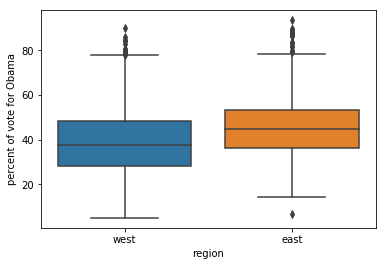

In [34]:
In [1]: import matplotlib.pyplot as plt
In [2]: import seaborn as sns
In [3]: _ = sns.boxplot(x='east_west', y='dem_share',
...: data=df_all_states)
In [4]: _ = plt.xlabel('region')
In [5]: _ = plt.ylabel('percent of vote for Obama')
In [6]: plt.show()

# Let’s practice!

In [38]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)


In [35]:
# Specify array of percentiles: percentiles
percentiles =np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[3.3    4.     4.35   4.6    4.9775]


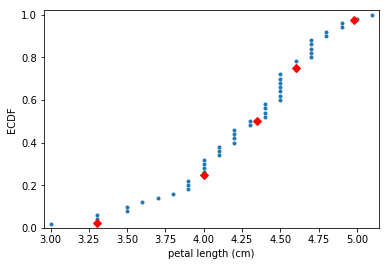

In [39]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
plt.margins(0.02)
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')

# Show the plot

plt.show()

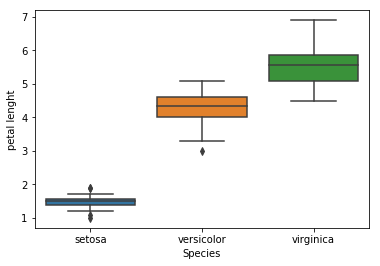

In [40]:
# Create box plot with Seaborn's default settings

_ = sns.boxplot(x='species',y='petal_length',data=iris)

# Label the axes
_= plt.xlabel('Species')
_= plt.ylabel('petal lenght')

# Show the plot

plt.show()


# Variance and standard deviation

# Variance
- The mean squared distance of the data from their
mean
- Informally, a measure of the spread of data

# 2008 Florida election results

![](https://i.imgur.com/xUZUC9A.png)


# Computing the variance

In [18]:
In [1]: np.var(dem_share_FL)

147.44278618846067

# Computing the standard deviation

In [20]:
np.std(dem_share_FL)

12.142602117687158

In [21]:
np.sqrt(np.var(dem_share_FL))

12.142602117687158

# 2008 Florida election results

![](https://i.imgur.com/27yPgWZ.png)




# Let’s practice!

In [41]:
# Array of differences to mean: differences

differences = versicolor_petal_length - np.mean(versicolor_petal_length)
# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.21640000000000004 0.21640000000000004


In [42]:
# Compute the variance: variance

variance = np.var(versicolor_petal_length)
# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print( np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


# Covariance and the Pearson correlation coefficient

## 2008 US swing state election results


![](https://i.imgur.com/ohdXRaT.png)


## Generating a scatter plot

In [22]:
In [1]: _ = plt.plot(total_votes/1000, dem_share,
...: marker='.', linestyle='none')
In [2]: _ = plt.xlabel('total votes (thousands)')
In [3]: _ = plt.ylabel('percent of vote for Obama')

NameError: name 'total_votes' is not defined

# Covariance

## ● A measure of how two quantities vary together

## Calculation of the covariance

![](https://i.imgur.com/TyjZvaB.png)



![](https://i.imgur.com/IGdHB0k.png)


# Pearson correlation coefficient
![](https://i.imgur.com/59HofSb.png)


# Let’s practice!

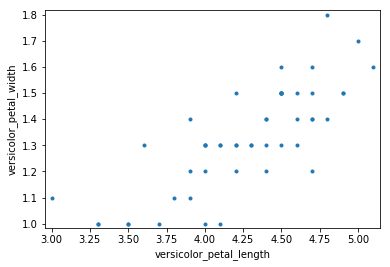

In [47]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')




# Set margins
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('versicolor_petal_length')
_ = plt.ylabel('versicolor_petal_width')

# Show the result
plt.show()

In [48]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov

petal_cov = covariance_matrix[0,1]

# Print the length/width covariance

print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [49]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228168
